In [2]:
import datetime as dt
import numpy as np
import pandas as pd
from pandas.api.types import is_list_like
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as data

In [3]:
from sklearn import mixture as mix

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import talib as ta
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [4]:
#import sklearn
#print (sklearn.__version__)

In [16]:
end = dt.date.today()
start = dt.datetime(end.year-5,end.month,end.day)
df = pd.DataFrame(data.DataReader('BSE/BOM517174', 'quandl', start=start, end=end ))  #Honeywell_Autom
df

,Open,High,Low,Close,WAP,NoofShares,NoofTrades,TotalTurnover,DeliverableQuantity,DeliQtytoTradedQty,SpreadHL,SpreadCO
Date,,,,,,,,,,,,
2018-11-07,20600.00,20800.00,20500.00,20637.65,20637.640000,33.0,25.0,681042.0,24.0,72.73,300.00,37.65
2018-11-06,20399.00,20659.05,20305.00,20329.10,20473.130000,68.0,43.0,1392173.0,42.0,61.76,354.05,-69.90
2018-11-05,20611.35,20611.35,20144.55,20341.10,20335.780000,45.0,35.0,915110.0,19.0,42.22,466.80,-270.25
2018-11-02,20600.00,20881.95,20005.00,20255.40,20307.380000,127.0,77.0,2579037.0,49.0,38.58,876.95,-344.60
2018-11-01,20222.00,20900.00,19925.00,20341.65,20365.750000,179.0,115.0,3645469.0,71.0,39.66,975.00,119.65
2018-10-31,19406.90,19844.05,19406.90,19801.30,19668.940000,34.0,25.0,668744.0,21.0,61.76,437.15,394.40
2018-10-30,19302.00,19548.95,19302.00,19413.45,19386.410000,29.0,16.0,562206.0,17.0,58.62,246.95,111.45
2018-10-29,19187.30,19398.95,19067.95,19331.85,19226.920000,39.0,29.0,749850.0,21.0,53.85,331.00,144.55
2018-10-26,18729.40,19288.00,18500.00,18765.40,18970.720000,499.0,68.0,9466387.0,30.0,6.01,788.00,36.00


In [17]:
df = df[['Open', 'High', 'Low', 'Close']]
df.describe()

,Open,High,Low,Close
count,1231.000000,1231.000000,1231.000000,1231.000000
mean,10240.321202,10369.212551,10106.464825,10231.382372
std,5148.911445,5227.250239,5075.621748,5136.746293
min,2312.150000,2400.000000,2312.150000,2375.100000
25%,7278.025000,7391.500000,7145.350000,7255.725000
50%,9054.000000,9155.450000,8978.000000,9066.000000
75%,12700.000000,12816.725000,12425.000000,12582.175000
max,23000.000000,24178.000000,22780.050000,22999.700000


In [18]:
#Spliting the data 80% for testing and 20% for training
n = 10
t = 0.8
split = int(t*len(df))
print(split)

984


In [19]:
# print(df['High'][:split])
# print(df['High'].shift(1))
#I created various technical indicators such as, RSI, SMA, ADX, Correlation, 
#Parabolic SAR, and the Return of the past 1- day on an Open to Open basis.

# df['High'] = df['High'].shift(1)
# df['Low'] = df['Low'].shift(1)
# df['Close'] = df['Close'].shift(1)
df['RSI']= ta.RSI(np.array(df['Close']), timeperiod=n)
df['SMA']= df['Close'].rolling(window=n).mean()
df['Corr']= df['SMA'].rolling(window=n).corr(df['Close'])
df['SAR']= ta.SAR(np.array(df['High']),np.array(df['Low']),0.2,0.2)
df['ADX']= ta.ADX(np.array(df['High']),np.array(df['Low']),np.array(df['Close']), timeperiod=n)
df['Return']= np.log(df['Open']/df['Open'].shift(1))

df = df.dropna()
df


c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Open,High,Low,Close,RSI,SMA,Corr,SAR,ADX,Return
Date,,,,,,,,,,
2018-10-10,18449.60,19322.85,18329.10,19199.55,42.251922,19097.555,-0.695721,19661.384000,30.169834,-0.029396
2018-10-09,18300.00,18363.40,17980.00,18122.30,31.074806,19055.765,-0.346765,19394.927200,29.622268,-0.008142
2018-10-08,18668.85,18668.85,18199.70,18283.90,33.985554,19029.000,0.016052,19322.850000,27.755849,0.019955
2018-10-05,19000.00,19100.00,18550.00,18668.85,40.622510,18990.050,0.111938,17980.000000,25.519051,0.017583
2018-10-04,19150.00,19300.00,18955.00,19037.30,46.357953,19004.680,0.203250,18199.700000,24.173621,0.007864
2018-10-03,20667.25,20667.25,19597.00,19662.45,54.621371,19038.135,0.200173,18419.760000,26.031478,0.076248
2018-10-01,20400.05,20500.00,20000.00,20315.05,61.500450,19077.155,0.387697,18869.258000,27.703549,-0.013013
2018-09-28,20910.55,21007.40,20605.00,20731.00,65.232939,19202.815,0.697354,19228.856400,29.997561,0.024716
2018-09-27,21700.00,21700.00,21198.30,21288.50,69.619278,19403.740,0.807952,19584.565120,32.915626,0.037058


# Standard Scaler

c:\program files (x86)\python36-32\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


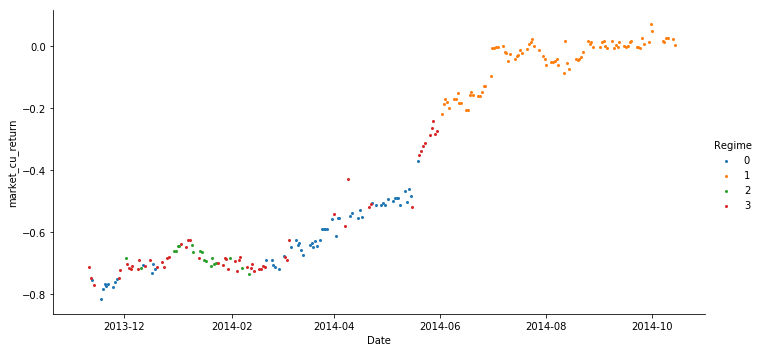

Mean for regime 0: -0.7329974385842946
Co-Variance for regime 0: 0.18639271860104203
Mean for regime 1: 1.4932747153193442
Co-Variance for regime 1: 0.593501059396659
Mean for regime 2: -0.5759802125385255
Co-Variance for regime 2: 0.12118877862501638
Mean for regime 3: -0.48957907056542316
Co-Variance for regime 3: 0.5316650530070192


In [20]:
ss = StandardScaler()
unsup = mix.GaussianMixture(n_components=4,covariance_type='spherical', n_init=100, random_state=42)
#df = df.drop(['High','Low','Close'], axis=1)
unsup.fit(np.reshape(ss.fit_transform(df[:split]),(-1, df.shape[1])))
regime=unsup.predict(np.reshape(ss.fit_transform(df[split:]),(-1, df.shape[1])))
Regimes= pd.DataFrame(regime, columns=['Regime'],index=df[split:].index).join(df[split:], how='inner').assign(market_cu_return=df[split:].Return.cumsum()).reset_index(drop=False).rename(columns={'index':'Date'})

orders=[0,1,2,3]
fig = sns.FacetGrid(data=Regimes, hue='Regime', hue_order=orders, aspect=2, size=5)
fig.map(plt.scatter, 'Date', 'market_cu_return', s=4).add_legend()
plt.show()

for i in orders:
    print("Mean for regime %i:"%i,unsup.means_[i][0])
    print('Co-Variance for regime %i:'%i,(unsup.covariances_[i]))

In [21]:
ss1 = StandardScaler()
columns = Regimes.columns.drop(['Regime','Date'])
Regimes[columns] = ss1.fit_transform(Regimes[columns])
Regimes['Signal'] = 0
Regimes.loc[Regimes['Return']>0, 'Signal'] = 1
Regimes.loc[Regimes['Return']<0, 'Signal'] = -1

In [22]:
cls = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',max_iter=-1,probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)

In [23]:
split2 = int(.8*len(Regimes))

X = Regimes.drop(['Signal','Return', 'market_cu_return', 'Date'], axis=1)
y = Regimes['Signal']
cls.fit(X[:split2],y[:split2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
print(len(X))
p_data = len(X)-split2
print(p_data)

228
46


In [25]:
df['Pred_Signal']=0
df.iloc[-p_data:,df.columns.get_loc('Pred_Signal')] = cls.predict(X[split2:])
print(df['Pred_Signal'][-p_data:])
df['str_ret'] = df['Pred_Signal']*df['Return'].shift(-1)

Date
2014-01-15    1
2014-01-14    1
2014-01-13    1
2014-01-10    1
2014-01-09    1
2014-01-08    1
2014-01-07    1
2014-01-06    1
2014-01-03    1
2014-01-02    1
2014-01-01    1
2013-12-31    1
2013-12-30    1
2013-12-27    1
2013-12-26    1
2013-12-24    1
2013-12-23    1
2013-12-20    1
2013-12-19    1
2013-12-18    1
2013-12-17    1
2013-12-16    1
2013-12-13    1
2013-12-12    1
2013-12-11    1
2013-12-10    1
2013-12-09    1
2013-12-06    1
2013-12-05    1
2013-12-04    1
2013-12-03    1
2013-12-02    1
2013-11-29    1
2013-11-28    1
2013-11-27    1
2013-11-26    1
2013-11-25    1
2013-11-22    1
2013-11-21    1
2013-11-20    1
2013-11-19    1
2013-11-18    1
2013-11-14    1
2013-11-13    1
2013-11-12    1
2013-11-11    1
Name: Pred_Signal, dtype: int64


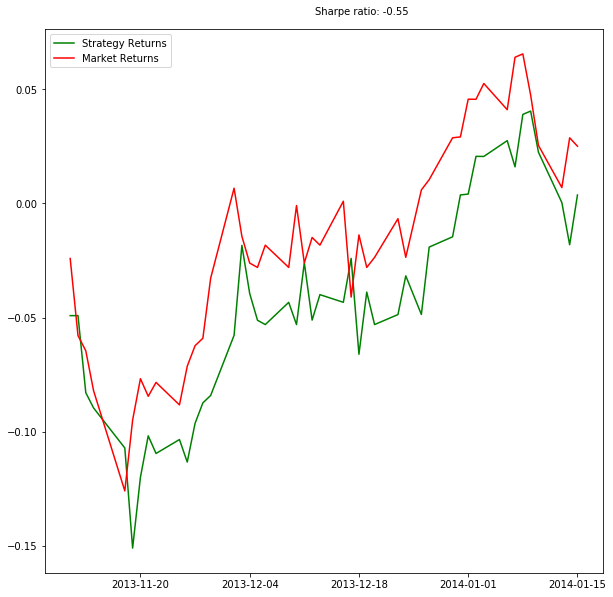

In [26]:
df['strategy_cu_return']=0
df['market_cu_return']=0
df.iloc[-p_data:,df.columns.get_loc('strategy_cu_return')] = np.nancumsum(df['str_ret'][-p_data:])
df.iloc[-p_data:,df.columns.get_loc('market_cu_return')] = np.nancumsum(df['Return'][-p_data:])
Sharpe = (df['strategy_cu_return'][-1]-df['market_cu_return'][-1])/np.nanstd(df['strategy_cu_return'][-p_data:])
df.dropna()

fig= plt.subplots(figsize = (10,10))
plt.plot(df['strategy_cu_return'][-p_data:], color='g', label='Strategy Returns')
plt.plot(df['market_cu_return'][-p_data:], color='r', label='Market Returns')
plt.figtext(0.5,0.9, s='Sharpe ratio: %.2f'%Sharpe)
plt.legend(loc='best')
plt.show()